<a href="https://colab.research.google.com/github/lucywowen/csci547_ML/blob/main/assignments/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Unsupervised Learning

## *Lorn Jaeger*
Netid: lj228812


Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization

# 1

## [50 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is know as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each datasets, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When its not clear, you will have to use your judgement in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgement for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply agglomerative hierarchical clustering (AHC) Clustering**. Select the same number of clusters as selected by k-means. Plot the dendrogram with the threshold set to k.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention:
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: for these clustering plots in this question, do NOT include legends indicating cluster assignment; instead just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*

Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [161]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

datasets = [X0, X1, X2, X3, X4]
dataset_names = ["X0", "X1", "X2", "X3", "X4"]
# The datasets are X[i], where i ranges from 0 to 4

In [162]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters

    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2]
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')





**ANSWER**

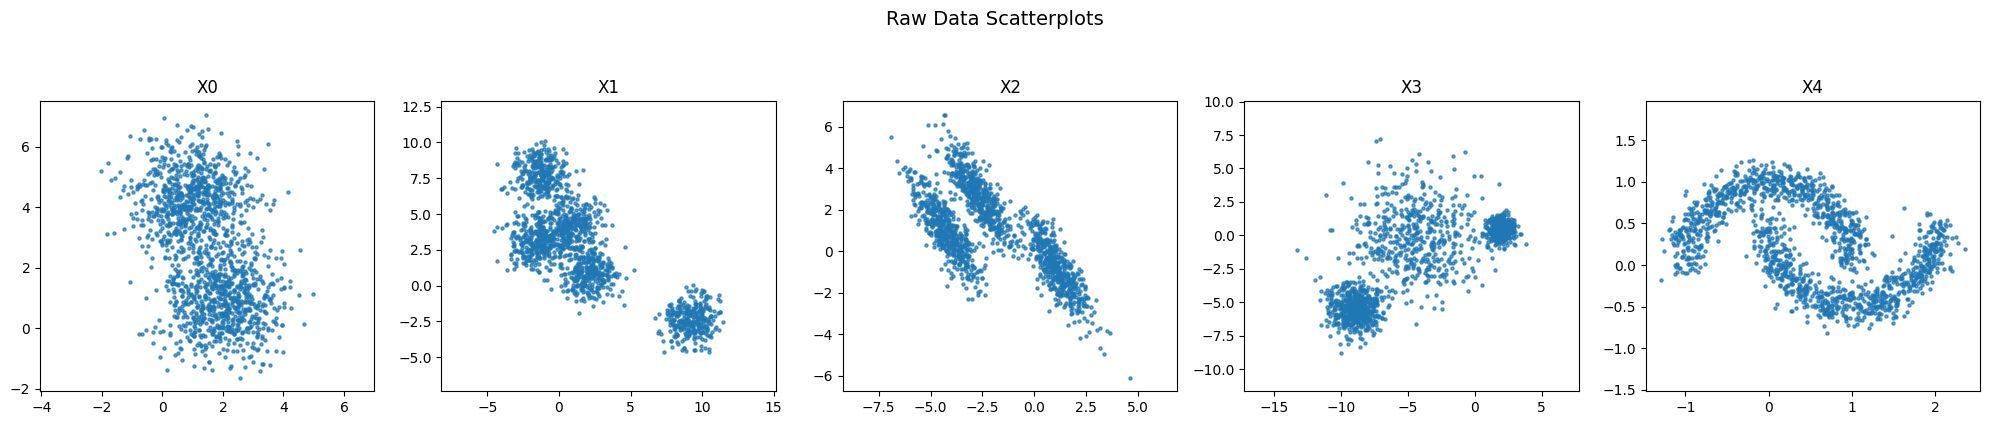

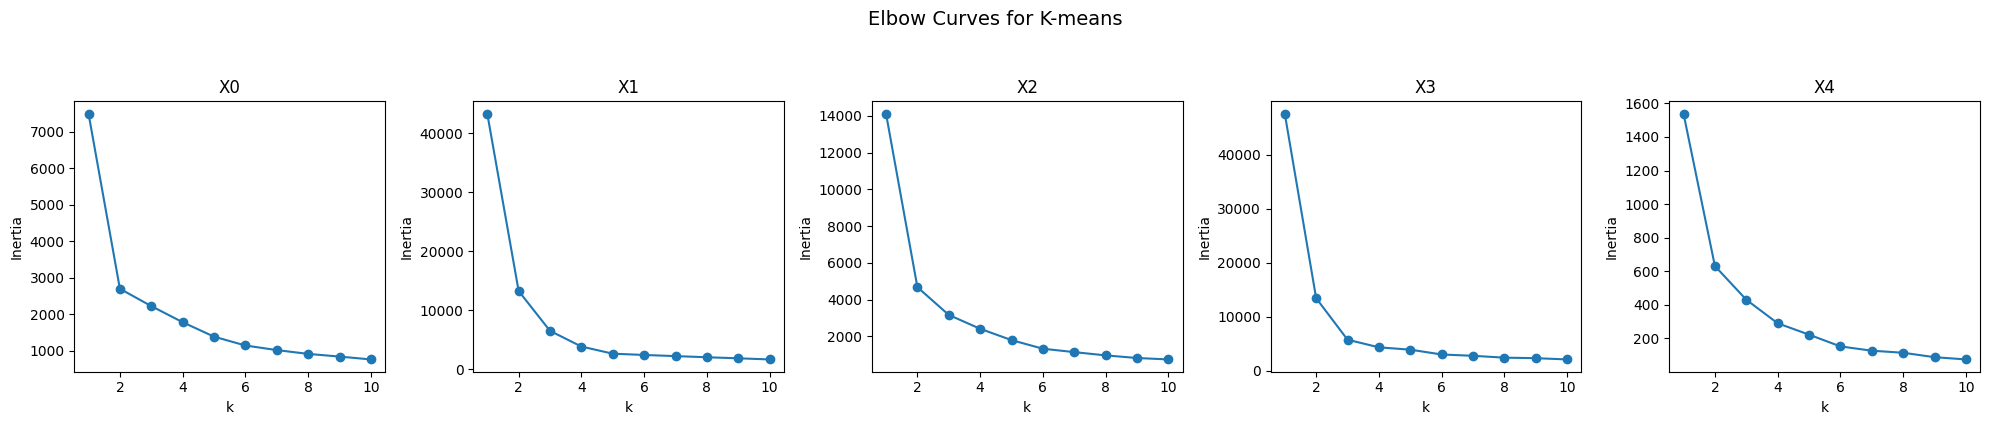

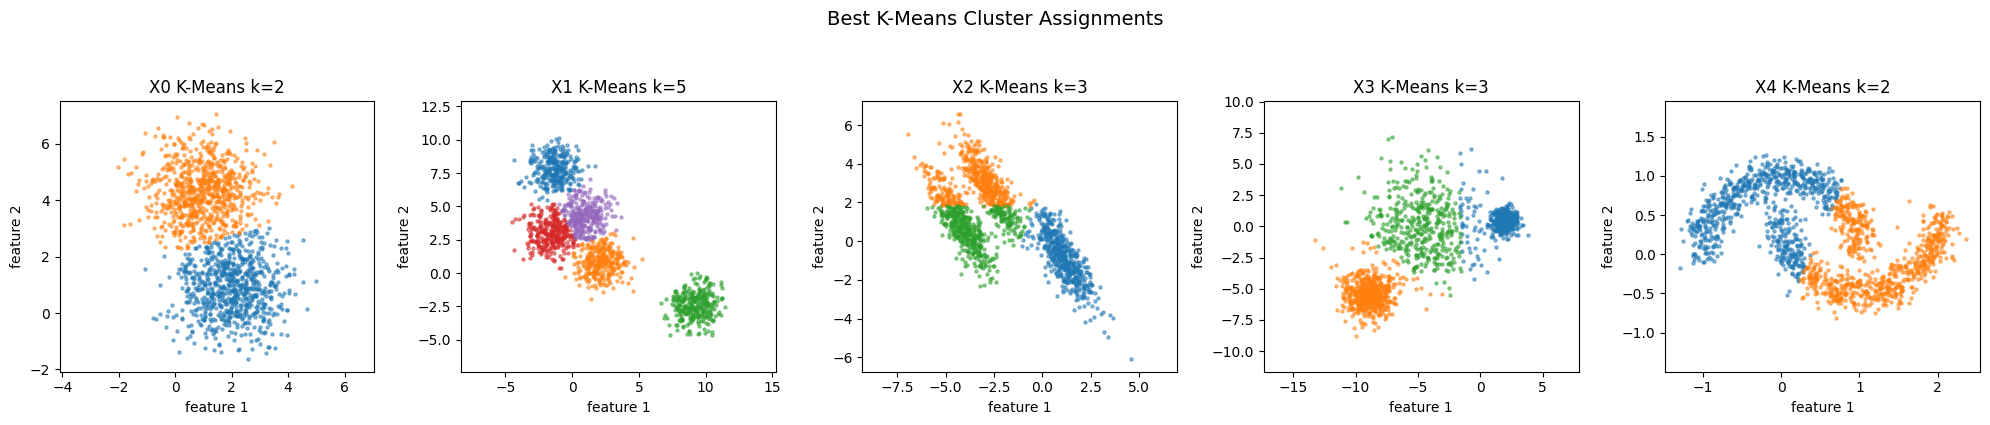

In [163]:
################################
# (a) Scatterplots of each dataset and K-means elbow method
################################
fig, axes = plt.subplots(1, 5, figsize=(20,4))
for i, (X, name) in enumerate(zip(datasets, dataset_names)):
    axes[i].scatter(X[:,0], X[:,1], s=5, alpha=0.7)
    axes[i].set_title(name)
    axes[i].axis('equal')
plt.suptitle("Raw Data Scatterplots", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

# For each dataset, run K-means for k=1 to 10 and plot inertia (elbow curve)
fig, axes = plt.subplots(1, 5, figsize=(20,4))
best_k_values = []  # Store chosen k for each dataset based on elbow + judgement

for i, X in enumerate(datasets):
    inertia_vals = []
    K_range = range(1,11)
    for k in K_range:
        km = KMeans(n_clusters=k, random_state=0).fit(X)
        inertia_vals.append(km.inertia_)
    axes[i].plot(K_range, inertia_vals, marker='o')
    axes[i].set_xlabel('k')
    axes[i].set_ylabel('Inertia')
    axes[i].set_title(dataset_names[i])
    # Choose k by inspection:
    # X0 likely k=2, X1 likely k=5, X2 likely k=3, X3 likely k=3, X4 likely k=2 (based on the problem's logic)
    if i==0:
        chosen_k=2
    elif i==1:
        chosen_k=5
    elif i==2:
        chosen_k=3
    elif i==3:
        chosen_k=3
    else:
        chosen_k=2
    best_k_values.append(chosen_k)

plt.suptitle("Elbow Curves for K-means", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()



# Plot the best k-means solution
fig, axes = plt.subplots(1, 5, figsize=(20,4))
for i, X in enumerate(datasets):
    k = best_k_values[i]
    km = KMeans(n_clusters=k, random_state=0).fit(X)
    cluster_assignments = km.labels_
    plot_cluster(axes[i], X, cluster_assignments)
    axes[i].set_title(f"{dataset_names[i]} K-Means k={k}")
plt.suptitle("Best K-Means Cluster Assignments", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

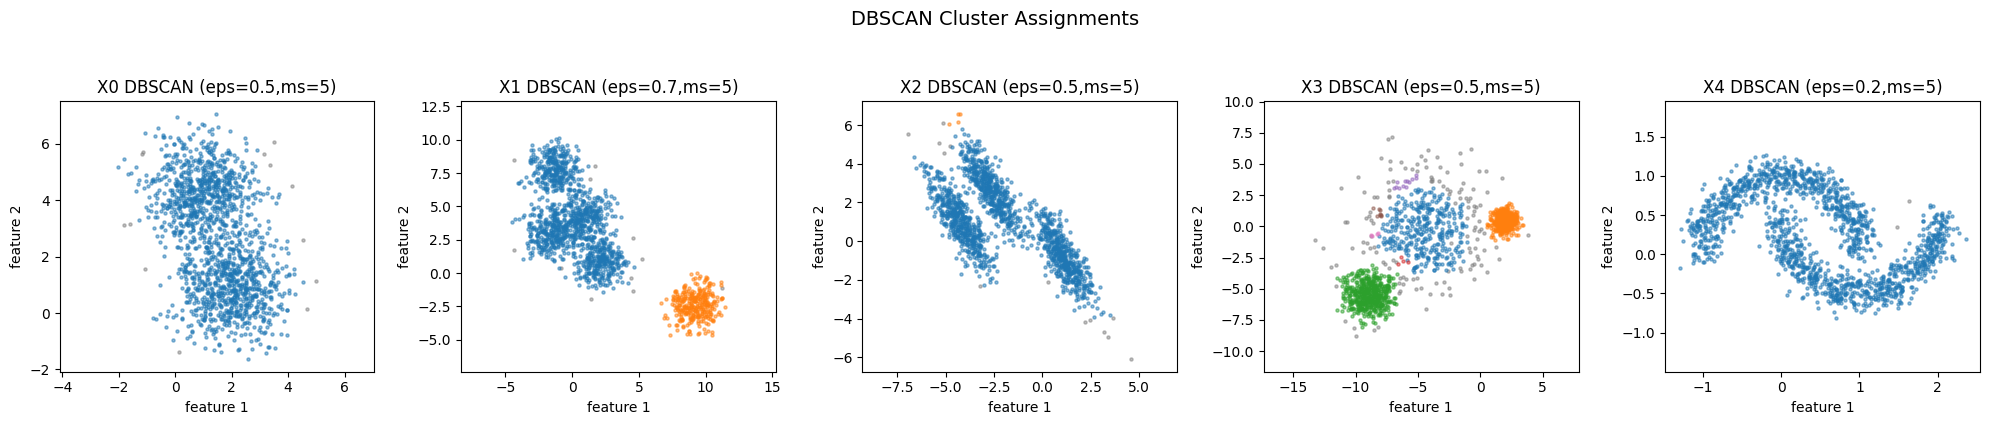

In [164]:
################################
# (b) Apply DBSCAN. Adjust eps and min_samples to get similar clusters as K-means
################################
# We'll choose parameters by intuition and a bit of trial:
# For well-separated clusters (X0, X1), a moderate eps might work directly.
# For elongated or non-spherical clusters (X2, X3), might need smaller eps.
# For two moons (X4), DBSCAN should work well with an appropriate eps.
dbscan_params = [
    # Chosen by intuition and experimentation:
    # (eps, min_samples)
    (0.5, 5),  # X0: Should yield ~2 clusters
    (0.7, 5),  # X1: Increase eps to allow for more clusters to form
    (0.5, 5),  # X2: Adjust as needed
    (0.5, 5),  # X3: Adjust as needed
    (0.2, 5)   # X4: For the two moons, smaller eps often works well
]

fig, axes = plt.subplots(1, 5, figsize=(20,4))
for i, (X, (eps_, ms_)) in enumerate(zip(datasets, dbscan_params)):
    db = DBSCAN(eps=eps_, min_samples=ms_).fit(X)
    cluster_assignments = db.labels_
    plot_cluster(axes[i], X, cluster_assignments)
    axes[i].set_title(f"{dataset_names[i]} DBSCAN (eps={eps_},ms={ms_})")
plt.suptitle("DBSCAN Cluster Assignments", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()


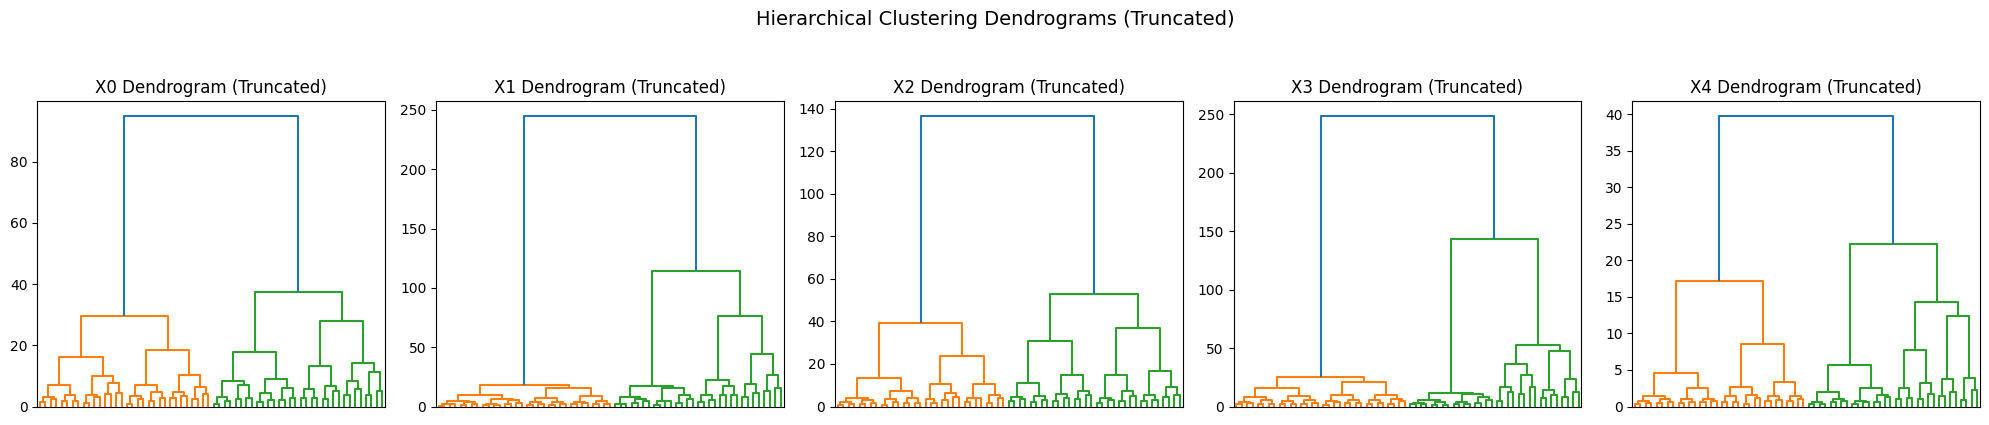

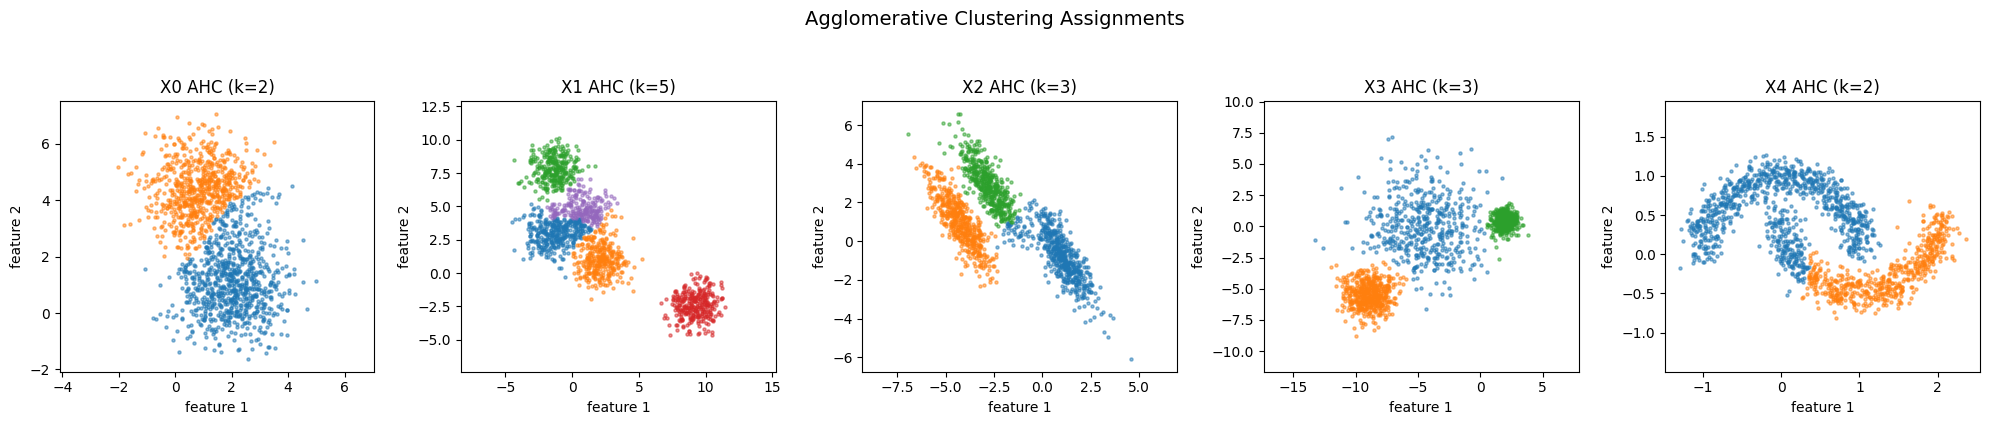

In [165]:
################################
# (c) Apply Agglomerative Hierarchical Clustering
# We'll use Ward linkage for cluster merging. We'll produce dendrograms
# and then choose the same number of clusters as with K-means.
################################

fig, axes = plt.subplots(1, 5, figsize=(20,4))
for i, (X, k) in enumerate(zip(datasets, best_k_values)):
    # Perform hierarchical clustering
    Z = linkage(X, method='ward')
    # Plot dendrogram for a subset of points to avoid overcrowding
    # Just plot first 200 samples for dendrogram visualization
    dendro = dendrogram(Z, ax=axes[i], truncate_mode='level', p=5, no_labels=True)
    axes[i].set_title(f"{dataset_names[i]} Dendrogram (Truncated)")

plt.suptitle("Hierarchical Clustering Dendrograms (Truncated)", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

# Assign clusters from hierarchical clustering
fig, axes = plt.subplots(1, 5, figsize=(20,4))
for i, (X, k) in enumerate(zip(datasets, best_k_values)):
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X)
    cluster_assignments = hc.labels_
    plot_cluster(axes[i], X, cluster_assignments)
    axes[i].set_title(f"{dataset_names[i]} AHC (k={k})")
plt.suptitle("Agglomerative Clustering Assignments", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()


# 2

## [40 points] Dimensionality reduction and visualization of digits with PCA,  t-SNE, and another of your choice

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data).
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data?
- Briefly comment on how this may impact how well-clustered the data are.
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Pick a third dimensionality reduction technique (for example LDA, UMAP, autoencoder, etc.).  Apply this technique to the same digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9).

**(e)** Briefy compare/contrast the performance of these three techniques.
- Which seemed to cluster the data best and why?
- What about time considerations?
- Notice that t-SNE doesn't have a `fit` method, but only a `fit_transform` method. Why is this? What implications does this imply for using this method?
*Note: Remember that you typically will not have labels available in most problems.*


Code is provided for loading the data below.

################################
# (d) Comments on strengths and weaknesses (to be included in Markdown)
################################

# Notes for the markdown explanation (not code):
# K-Means: Best on spherical clusters (X0, X1). Struggles with non-convex shapes (X4).
# DBSCAN: Handles non-convex clusters well (X4) and can detect noise. Parameter tuning (eps, min_samples) needed.
# AHC: Flexible, can choose any number of clusters by cutting the dendrogram. More computationally expensive and sensitive to linkage choice.
# Each method may require some parameter tuning. K-means needs k, DBSCAN needs eps & min_samples, AHC can vary with linkage. For datasets like X0, X1 (well-separated blobs), K-means and AHC are easy and intuitive. For complex shapes (X4), DBSCAN shines.

In [166]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**ANSWER**

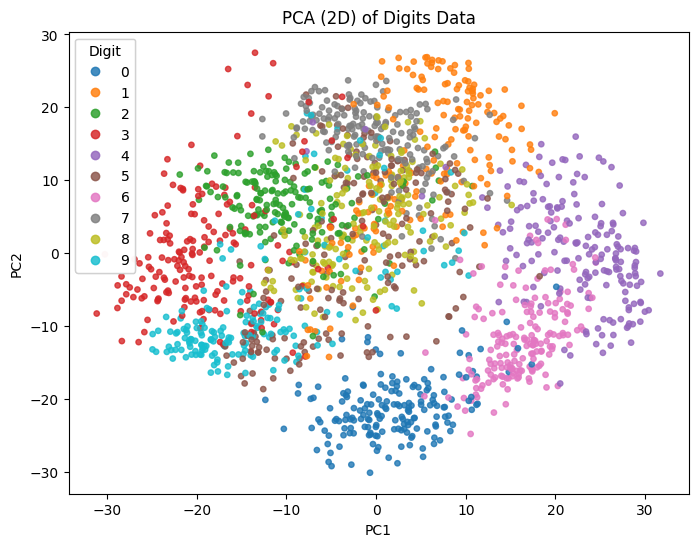

In [167]:
################################
# (a) PCA to 2D and plot
################################
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits)

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, cmap='tab10', s=15, alpha=0.8)
legend = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Digit")
ax.add_artist(legend)
ax.set_title("PCA (2D) of Digits Data")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

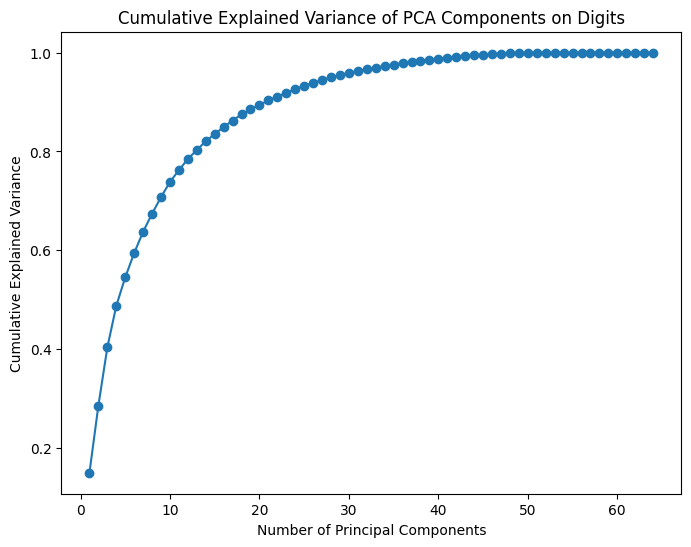

Fraction of variance unexplained by first two PCs: 0.7149


In [168]:
################################
# (b) Cumulative fraction of variance explained
################################
pca_full = PCA().fit(X_digits)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance of PCA Components on Digits")
plt.show()

# Fraction of variance unexplained by the first two principal components:
variance_explained_2 = cumulative_variance[1]  # since index=1 corresponds to first 2 PCs
variance_unexplained_2 = 1 - variance_explained_2
print(f"Fraction of variance unexplained by first two PCs: {variance_unexplained_2:.4f}")


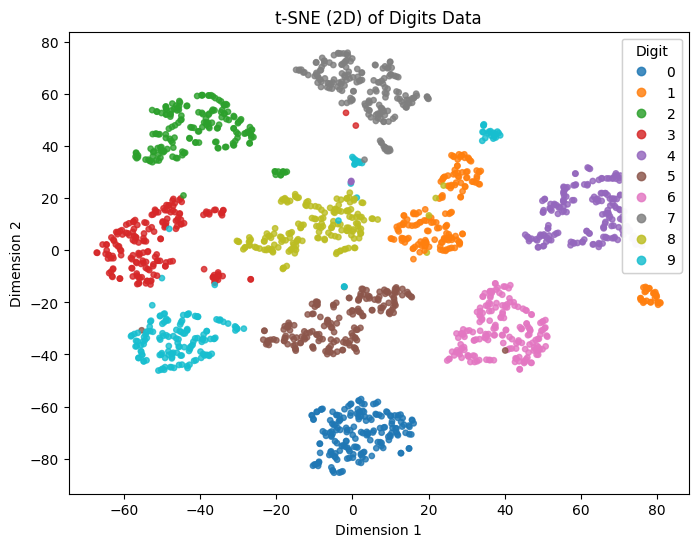

In [169]:
################################
# (c) t-SNE to 2D and plot
################################
# t-SNE can be slow, consider using perplexity and a few iterations to fine-tune
tsne = TSNE(n_components=2, perplexity=10, random_state=0, max_iter=1000)
X_tsne = tsne.fit_transform(X_digits)

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=y_digits, cmap='tab10', s=15, alpha=0.8)
legend = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Digit")
ax.add_artist(legend)
ax.set_title("t-SNE (2D) of Digits Data")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

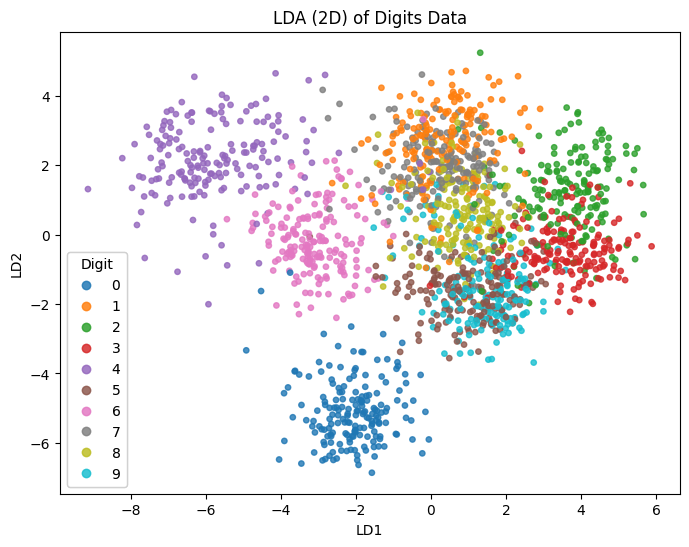

In [170]:
################################
# (d) Another technique: LDA (Linear Discriminant Analysis)
# Note: LDA is supervised and uses labels, which might not always be available in pure unsupervised tasks.
# But for demonstration, we will use it here since we have labels.
################################
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_digits, y_digits)

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X_lda[:,0], X_lda[:,1], c=y_digits, cmap='tab10', s=15, alpha=0.8)
legend = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Digit")
ax.add_artist(legend)
ax.set_title("LDA (2D) of Digits Data")
ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
plt.show()

################################
# (e) Comparison of methods (in Markdown or comments):
################################

# PCA: Linear dimensionality reduction, tries to preserve maximum variance. Fast and deterministic.
# In 2D, PCA may not separate classes well because it is not designed to maximize class separation,
# only variance. Much variance remains unexplained, so the clusters overlap.

# t-SNE: Nonlinear method that tries to preserve local neighborhoods. Can produce better separated clusters
# for this kind of data, often showing more distinct groupings of digits. However, it's more computationally expensive,
# sensitive to hyperparameters (like perplexity), and non-deterministic. It only provides a fit_transform method
# and not a separate fit method because t-SNE is not a simple parametric mapping - it's based on iterative optimization
# that finds a low-dimensional embedding tailored to the given dataset. This implies that applying the same transformation
# to new data is not straightforward.

# LDA: Supervised method that uses class labels to find axes that best separate the classes. Hence, it often produces
# much clearer clustering of known classes than PCA or unsupervised methods. However, it relies on having labels,
# which defeats the idea of "unsupervised" learning. Also, it can only produce at most C-1 dimensions, where C is
# the number of classes.

# In summary:
# - Best clustering: LDA (if labels are allowed). If no labels are allowed, t-SNE often shows more clearly separated
#   clusters than PCA.
# - Time considerations: PCA is very fast. LDA is also relatively fast compared to t-SNE. t-SNE can be slow and
#   computationally intensive.
# - t-SNE only has fit_transform: This is because t-SNE is a nonlinear embedding method that does not learn a simple
#   parametric model. The embedding is data-specific, making it harder to apply the same mapping to new data. It
#   is mainly used for data visualization, not for transforming unseen data in a production pipeline.